In [13]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [14]:
SEED = 4  # https://xkcd.com/221/
DATA_DIR = "../data/"
VALIDATION_SPLIT = 0.2
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 100

TRAIN_DS, VAL_DS = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=VALIDATION_SPLIT,
    subset="both",
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
)
NUM_CLASSES = len(TRAIN_DS.class_names)

Found 323 files belonging to 2 classes.
Using 259 files for training.
Using 64 files for validation.


In [15]:
AUTOTUNE = tf.data.AUTOTUNE

TRAIN_DS = TRAIN_DS.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
VAL_DS = VAL_DS.cache().prefetch(buffer_size=AUTOTUNE)

In [16]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Rescaling(1.0 / 255, input_shape=(*IMAGE_SIZE, 3)),
        tf.keras.layers.Conv2D(16, 3, padding="same", activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, 3, padding="same", activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(NUM_CLASSES),
    ]
)
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

In [17]:
EPOCHS = 30
trained = model.fit(TRAIN_DS, validation_data=VAL_DS, epochs=EPOCHS)

Epoch 1/30
3/3 [==============================] - 3s 649ms/step - loss: 1.2293 - accuracy: 0.5792 - val_loss: 0.9560 - val_accuracy: 0.3125
Epoch 2/30
3/3 [==============================] - 1s 440ms/step - loss: 0.8158 - accuracy: 0.3938 - val_loss: 0.7298 - val_accuracy: 0.3125
Epoch 3/30
3/3 [==============================] - 2s 603ms/step - loss: 0.6983 - accuracy: 0.4865 - val_loss: 0.6611 - val_accuracy: 0.6875
Epoch 4/30
3/3 [==============================] - 1s 413ms/step - loss: 0.6695 - accuracy: 0.6100 - val_loss: 0.6260 - val_accuracy: 0.6875
Epoch 5/30
3/3 [==============================] - 1s 371ms/step - loss: 0.6523 - accuracy: 0.6062 - val_loss: 0.6092 - val_accuracy: 0.7031
Epoch 6/30
3/3 [==============================] - 2s 548ms/step - loss: 0.6290 - accuracy: 0.6371 - val_loss: 0.6164 - val_accuracy: 0.7031
Epoch 7/30
3/3 [==============================] - 1s 406ms/step - loss: 0.5966 - accuracy: 0.7181 - val_loss: 0.5296 - val_accuracy: 0.7656
Epoch 8/30
3/3 [====

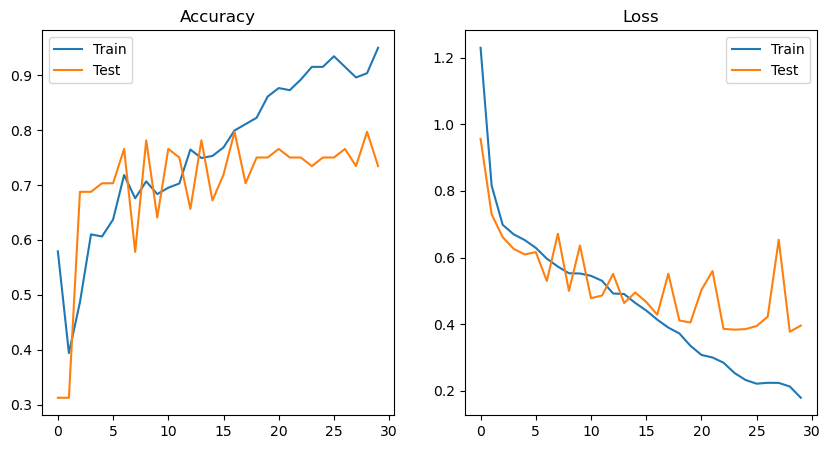

In [18]:
history = trained.history
epoch_numbers = range(EPOCHS)
figure, (ax_acc, ax_loss) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax_acc.plot(epoch_numbers, history["accuracy"], label="Train")
ax_acc.plot(epoch_numbers, history["val_accuracy"], label="Test")
ax_acc.legend()
ax_acc.set_title("Accuracy")
ax_loss.plot(epoch_numbers, history["loss"], label="Train")
ax_loss.plot(epoch_numbers, history["val_loss"], label="Test")
ax_loss.legend()
ax_loss.set_title("Loss")
plt.show()